# Algorithme des plus proches voisins

knn : k nearest neighbors

## Génération de données d'exemple

In [1]:
points_bleus = []
points_rouges = []

Dans un premier exemple les points au dessus de la diagonale sont bleus et ceux en dessous sont rouges.

[random — Generate pseudo-random numbers](https://docs.python.org/3/library/random.html)

    random.randint(a, b)
    Return a random integer N such that a <= N <= b. Alias for randrange(a, b+1).


In [2]:
import random
random.randint(0,100)

41

In [3]:
random.seed(42)

In [4]:
random.randint(0,100)

81

Génération de 10 points de chaque couleur:

In [5]:
n = 10  # Nombre de points par couleur

while len(points_bleus)!=n or len(points_rouges)!=n:
    x = random.randint(0,100)
    y = random.randint(0,100)
    if y >= x and len(points_bleus)<n:
        points_bleus.append((x,y))
    elif y < x and len(points_rouges)<n:
        points_rouges.append((x,y))

In [6]:
points_bleus

[(17, 94),
 (13, 86),
 (11, 75),
 (3, 11),
 (27, 29),
 (64, 77),
 (3, 71),
 (25, 91),
 (83, 89),
 (28, 57)]

In [7]:
points_rouges

[(14, 3),
 (94, 35),
 (31, 28),
 (94, 69),
 (54, 4),
 (69, 53),
 (75, 35),
 (54, 43),
 (35, 19),
 (43, 13)]

## Visualisation

[matplotlib scatter plot](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)

[Les couleurs sous matplotlib](https://matplotlib.org/stable/gallery/color/color_demo.html)

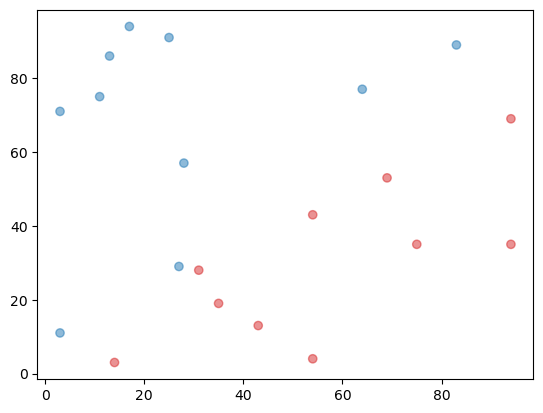

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# points_bleus puis points_rouges

abscisses = []
ordonnées = []
couleurs = []

for x,y in points_bleus:
    abscisses.append(x)
    ordonnées.append(y)
    couleurs.append('tab:blue')
for x,y in points_rouges:
    abscisses.append(x)
    ordonnées.append(y)
    couleurs.append('tab:red')

plt.scatter(abscisses, ordonnées, c=couleurs, alpha=0.5)
plt.show()

## Classification d'un nouveau point pris au hasard

exemple avec k = 3

In [10]:
# nouveau_point = (random.randint(0,100), random.randint(0,100))
nouveau_point = (11, 48)

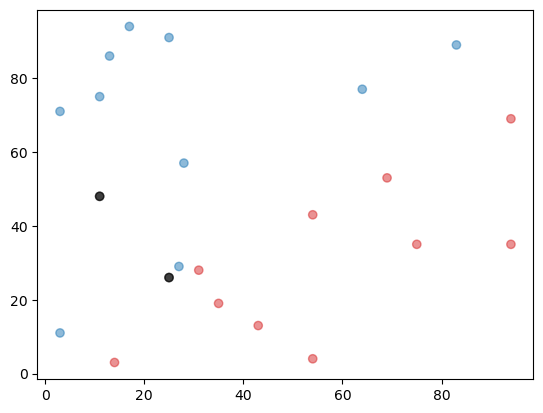

In [12]:
# Visualisation du jeu de données et des points que l'on cherche à classer (ici représentés en vert)
abscisses.append(11)
ordonnées.append(48)
abscisses.append(25)
ordonnées.append(26)
couleurs.append('black')
couleurs.append('black')
plt.scatter(abscisses, ordonnées, c=couleurs, alpha=0.5)
plt.show()

## Jeu de données initial et étiquettes associées

In [13]:
points = points_bleus + points_rouges
couleurs = ['bleu']*10 + ['rouge']*10

In [14]:
couleurs

['bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge']

## Etapes de l'algorithme

Distance entre deux points A et B du plan:

$$ L_2(A,B) = \sqrt{(x_A-x_B)^2+(y_A-y_B)^2}$$

[python library math](https://docs.python.org/3/library/math.html)
 
    math.dist(p, q)

    Return the Euclidean distance between two points p and q, each given as a sequence (or iterable) of coordinates. The two points must have the same dimension.

In [15]:
import math

origine = (0,0)
unité = (1,1)
math.dist(origine, unité)

1.4142135623730951

Calcul de l'ensemble des distances du nouveau point aux points du jeu de données initiales

In [16]:
distances = [math.dist(point, nouveau_point) for point in points]

In [17]:
# La ligne précédente est équivalente à :
distances = []
for point in points:
    distances.append(math.dist(point, nouveau_point))

[realpython list comprehension](https://realpython.com/list-comprehension-python/)

In [18]:
distances

[46.389654018972806,
 38.05259518088089,
 27.0,
 37.8549864614954,
 24.839484696748443,
 60.41522986797286,
 24.351591323771842,
 45.221676218380054,
 82.85529554590944,
 19.235384061671343,
 45.09988913511872,
 84.01190391843289,
 28.284271247461902,
 85.61541917201598,
 61.5223536610881,
 58.215118311311535,
 65.30696746902278,
 43.289721643826724,
 37.64306044943742,
 47.4236228055175]

In [19]:
# Liste des distances associées aux couleurs de points
[(d, c) for (d,c) in zip(distances, couleurs)]

[(46.389654018972806, 'bleu'),
 (38.05259518088089, 'bleu'),
 (27.0, 'bleu'),
 (37.8549864614954, 'bleu'),
 (24.839484696748443, 'bleu'),
 (60.41522986797286, 'bleu'),
 (24.351591323771842, 'bleu'),
 (45.221676218380054, 'bleu'),
 (82.85529554590944, 'bleu'),
 (19.235384061671343, 'bleu'),
 (45.09988913511872, 'rouge'),
 (84.01190391843289, 'rouge'),
 (28.284271247461902, 'rouge'),
 (85.61541917201598, 'rouge'),
 (61.5223536610881, 'rouge'),
 (58.215118311311535, 'rouge'),
 (65.30696746902278, 'rouge'),
 (43.289721643826724, 'rouge'),
 (37.64306044943742, 'rouge'),
 (47.4236228055175, 'rouge')]

In [20]:
distances_classées = sorted([(d, c) for (d,c) in zip(distances, couleurs)])
distances_classées

[(19.235384061671343, 'bleu'),
 (24.351591323771842, 'bleu'),
 (24.839484696748443, 'bleu'),
 (27.0, 'bleu'),
 (28.284271247461902, 'rouge'),
 (37.64306044943742, 'rouge'),
 (37.8549864614954, 'bleu'),
 (38.05259518088089, 'bleu'),
 (43.289721643826724, 'rouge'),
 (45.09988913511872, 'rouge'),
 (45.221676218380054, 'bleu'),
 (46.389654018972806, 'bleu'),
 (47.4236228055175, 'rouge'),
 (58.215118311311535, 'rouge'),
 (60.41522986797286, 'bleu'),
 (61.5223536610881, 'rouge'),
 (65.30696746902278, 'rouge'),
 (82.85529554590944, 'bleu'),
 (84.01190391843289, 'rouge'),
 (85.61541917201598, 'rouge')]

In [21]:
k=3
distances_classées[:k]

[(19.235384061671343, 'bleu'),
 (24.351591323771842, 'bleu'),
 (24.839484696748443, 'bleu')]

Cas d'une classification erronée (dûe au manque de points dans le jeu de données initial)

In [22]:
nouveau_point = (25, 26)  # devrait être classé en bleu
distances = [math.dist(point, nouveau_point) for point in points]
plus_petites_distances = sorted([(d, c) for (d,c) in zip(distances, couleurs)])[:k]
plus_petites_distances

[(3.605551275463989, 'bleu'),
 (6.324555320336759, 'rouge'),
 (12.206555615733702, 'rouge')]

Extraction de la couleur la plus fréquente:

In [23]:
from collections import Counter
Counter([couleur for _, couleur in plus_petites_distances]).most_common(1)[0][0]

'rouge'

## Fonction kNN

In [24]:
from collections import Counter

def kNN(X, y, new_x, k=3):
    """
    X: jeu de données initiales
    y: classes associées aux éléments de X 
    new_x: nouveau point que l'on souhaite classer
    k: nombre de voisins pris dans l'évaluation
    """
    distances = [math.dist(new_x, x) for x in X]
    plus_petites_distances = sorted([(d, c) for (d,c) in zip(distances, y)])[:k]
    counter = Counter([classe for _, classe in plus_petites_distances])
    
    return counter.most_common(1)[0][0]

In [25]:
kNN(points, couleurs, (25, 26))  # devrait être classé en bleu

'rouge'

In [26]:
kNN(points, couleurs, (11, 48))  # devrait être classé en bleu

'bleu'

## Références

[StatQuest: K-nearest neighbors, Clearly Explained](https://www.youtube.com/watch?v=HVXime0nQeI)